Todas las preguntas están consideradas para tener 1 punto en total cada una. La nota debería calcularse con una base de 1 punto más el resultado obtenido en las preguntas. De encontrar elementos de una pregunta contestados en otra asignar el puntaje que corresponde donde debería y dejar comentarios en la tabla del corrector.

#Pregunta 1

In [ ]:
!gdown --id 1rR0CjYZDgMfZDVYlyPxJdYpDN1XH5AYq
!pip install face_recognition
from google.colab import output
output.clear()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import face_recognition as fr
import cv2
from PIL import Image
import random as rnd

In [ ]:
df = pd.read_csv("mini_fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,ToV
1,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,ToV
2,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,ToV
3,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,ToV
4,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,ToV


In [ ]:
df.shape

(17160, 3)

In [ ]:
for col in df.columns:
    print(df[col].isnull().any())

False
False
False


In [ ]:
for col in df.columns:
    print(df[col].duplicated().any())

True
True
True


In [ ]:
#Como hay duplicados se procederá a borrarlos
df = df.drop_duplicates()

**Carga del set de datos, revisión e intento de una limpieza: 0.2 pts.**


In [ ]:
df.emotion.value_counts()

3    6202
6    3904
0    1933
5    1750
4    1444
2    1129
1     113
Name: emotion, dtype: int64

In [ ]:
num_classes = 7
width = 48
height = 48
classes = np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

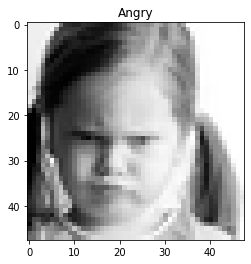

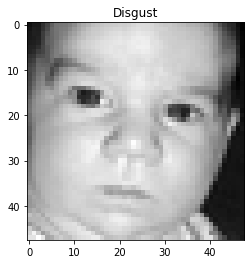

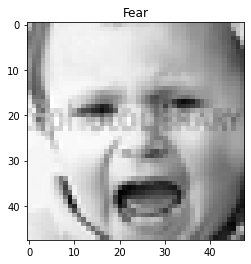

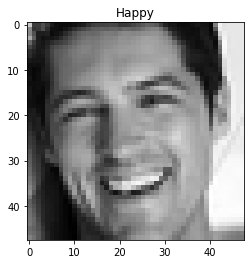

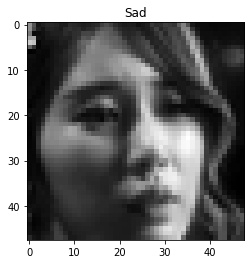

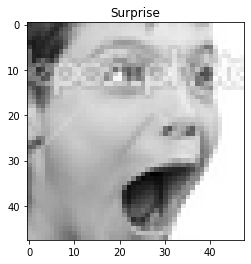

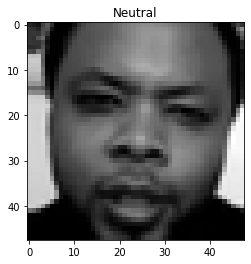

In [ ]:
indexes = []
labels = []
for (label, group) in df.groupby('emotion'):
    num_group = len(group)
    instance = rnd.randint(0, num_group)
    index = group.index[instance]
    pixels = group['pixels'][index]
    indexes.append(index)
    labels.append(label)
    image = np.reshape(pixels.split(" "), (48, 48)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    plt.figure()
    plt.imshow(image, cmap="gray")
    plt.title(classes[label])


**Despliegue de las imágenes**


*   Todas las clases con nombre: 0.3 pts
*   Todas las clases sin nombre: 0.2 pts
*   Algunas clases con nombre: 0.2 pts
*   Algunas clases sin nombre: 0.1 pts


In [ ]:
def saveImg(index, name):
    image = np.reshape(df.at[index, "pixels"].split(" "), (width, height)).astype("uint8")
    image = image[:, :, np.newaxis]
    img = np.concatenate((np.copy(image), np.copy(image), np.copy(image)), axis=2)
    img = Image.fromarray(img)
    img = img.resize((96, 96))
    img.save(name)

In [ ]:
def showLM(imgfile, radius=2, thicness=2, class_text=''):
    img1 = fr.load_image_file(imgfile)
    face_landmarks_list = fr.face_landmarks(img1)
    w, h, c = img1.shape
    img2 = img1.copy()
    img2 = cv2.rectangle(img2, (0, 0), (h, w), (255, 255, 255), thickness=-1)
    print(len(face_landmarks_list))
    point_type = list(face_landmarks_list[0].keys())

    for face in face_landmarks_list:
        for group in point_type:
            for point in face[group]:
                img1 = cv2.circle(img1, point, radius, (255, 0, 255), thickness=thicness)
                img2 = cv2.circle(img2, point, radius, (255, 0, 255), thickness=thicness)

    RGB_im = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    RGB_bl = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    fig = plt.figure(figsize=(19.2,6.5))
    plt.subplot(1,2,1)
    plt.imshow(RGB_im)
    plt.axis('off')
    plt.title(f'Landmarks, class {class_text}')
    plt.subplot(1,2,2)
    plt.imshow(RGB_bl)
    plt.axis('off')
    plt.title(f'Only Landmarks, class {class_text}')
    plt.show()

1


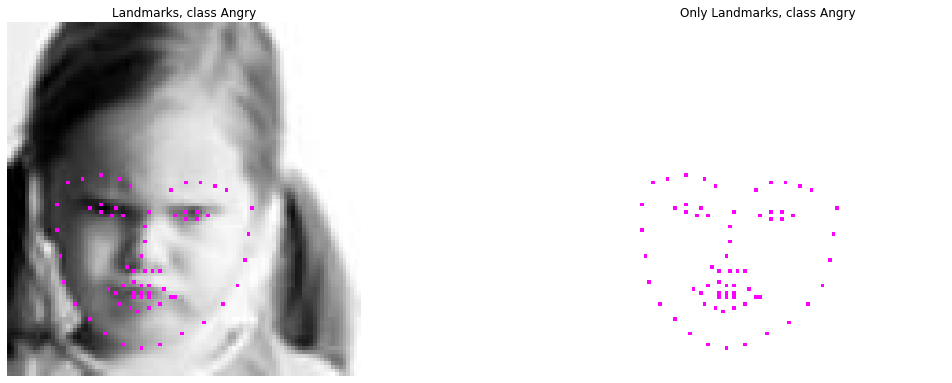

1


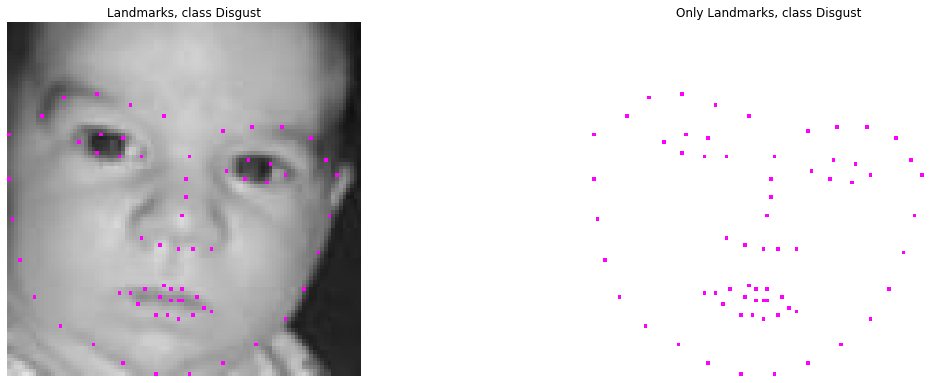

1


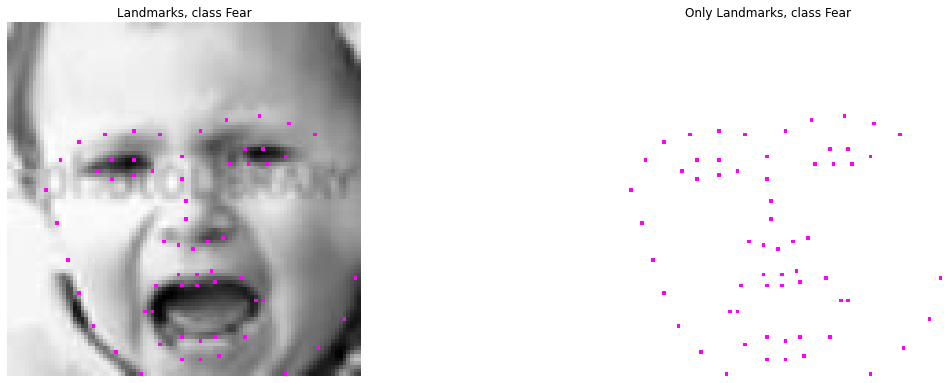

1


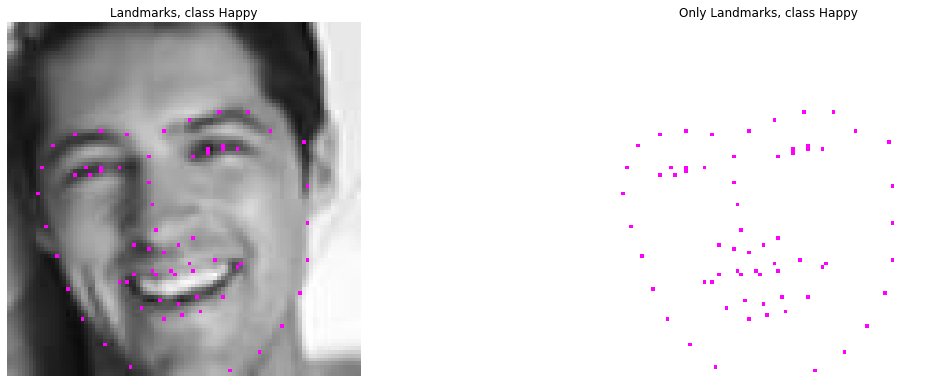

1


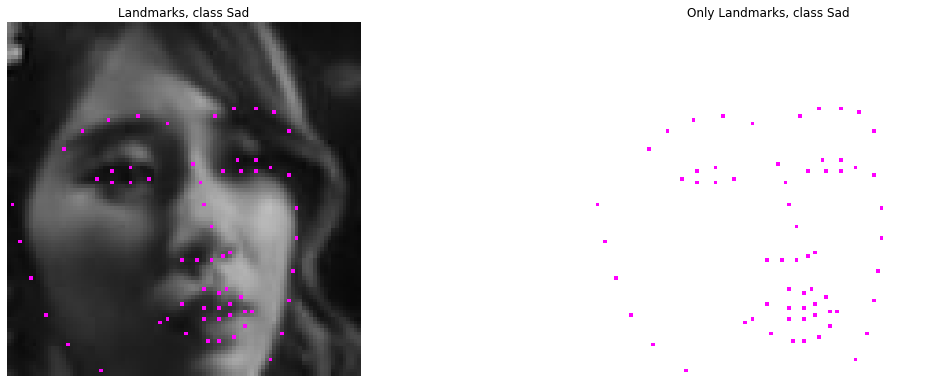

1


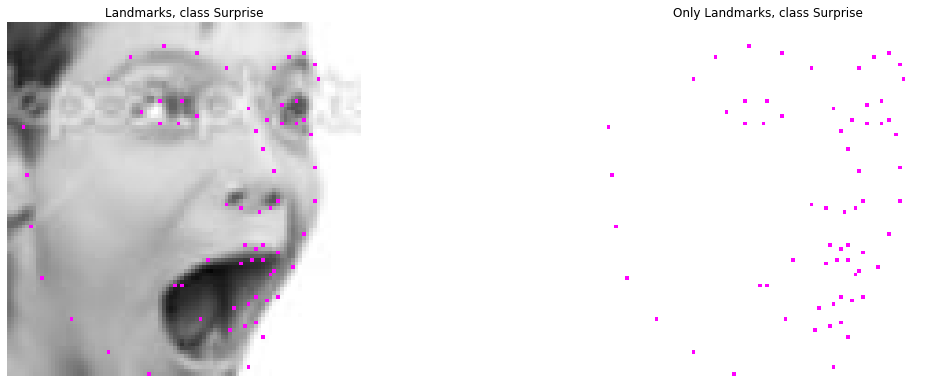

1


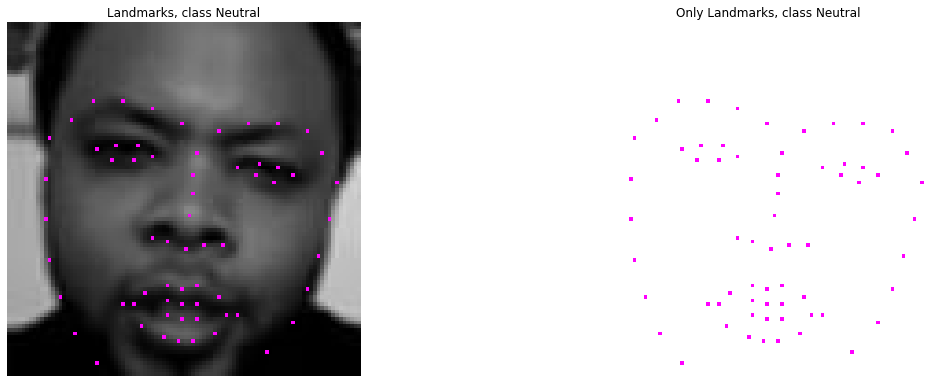

In [ ]:
for (label, index) in zip(labels, indexes):
    saveImg(index, "working.jpg")
    showLM("working.jpg", radius=0, thicness=1, class_text=classes[label])

**Despliegue de las imágenes, con nombre de la clase, máscara y máscara duplicado: 0.5**

**Descuentos**
*   Falta la máscara de puntos: 0.25 pts
*   No utilizó las mismas imágenes: 0.1 pts
*   Falta alguna clase: 0.1 pts
*   Falta el duplicado en blanco con la máscara o se entrega en un formato diferente al pedido: 0.05 pts


# Pregunta 2

In [ ]:
groups = [i for _, i in df.groupby('Usage')]
training_data = groups[1]
testing_data = groups[0]

In [ ]:
training_data.Usage.unique()

array(['ToV'], dtype=object)

**Separación del set de datos según usage: 0.3**

In [ ]:
def extract_features(dset):
    extracted = []
    for (emotion, pixels) in zip(dset.emotion, dset.pixels):
        image = np.reshape(pixels.split(" "), (width, height)).astype("uint8")
        image = image[:, :, np.newaxis]
        img = np.concatenate((np.copy(image), np.copy(image), np.copy(image)), axis=2)
        img = Image.fromarray(img)
        img = img.resize((96, 96))
        img.save("working.jpg")
        img = fr.load_image_file("working.jpg")
        face_landmarks_list = fr.face_landmarks(img)
        if len(face_landmarks_list) == 0:
            continue
        extracted.append([emotion, face_landmarks_list[0]])

    return extracted

Se puede volver a aplicar una etapa de limpieza a los datos, en especial para los casos en los que la matriz no agrega resultados. El alumno debe justificar esto. En este caso, se induciría a un error, y una reducción del accuracy, cosa que se vería en el resultado final. 
* Si el objetivo es probar el funcionamiento de las técnicas en un set más idealizado, para ver diferencias entre ellas entonces tiene sentido quitarlos.
* Por otro lado, si se quiere probar la exactitud de la metodología completa (incluyendo el efecto del extractor de características) sería mejor dejarlos. 

Cualquiera de estas dos justificaciones pueden servir. El objetivo es clasificar emociones, por lo que en principio la segunda explicación se adapta mejor al contexto, pues el efecto del extractos de características se siente. Sin embargo, en un contexto de aprendizaje basta con que el alumno reconozca lo que está haciendo al dejar o quitar los datos.

In [ ]:
train_set = extract_features(training_data)
test_set = extract_features(testing_data)

In [ ]:
def features_matrix(dset):
    point_type = list(dset[0][1].keys())
    # point_type = ['left_eyebrow', 'right_eyebrow', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip']
    for (i, elem) in enumerate(dset):
        x = []        
        for group in point_type:
            for point in elem[1][group]:
                x.append(point)
        x = np.array(x).astype("float64")
        cm = cm = np.array([np.mean(x[:,0]), np.mean(x[:,1])])
        x -= cm
        x = x.reshape(1, -1)
        if i == 0:
            X = x
            y = [elem[0]]
        else:
            X = np.concatenate((X, x))  
            y.append(elem[0])          
    return X, np.array(y)

In [ ]:
X_train, y_train = features_matrix(train_set)
X_test, y_test = features_matrix(test_set)

Es una práctica común el tener 3 sets de trabajo. En muy contadas y justificadas ocasiones se utilizan 2, pero no es el caso de esta tarea.

El det de entrenamiento se utilizará para encontrar los parámetros del modelo. Con este set se hará la mayor parte del procesamiento.

El set de validación sirve para encontrar hiperparámetros y tener una idea de cómo generalizará el clasificador a datos nuevos. No se entrena no él, pero se utiliza en cada entrenamiento en la búsqueda de hiperparámetros, por lo que de alguna forma es "conocido" para el clasificador.

El set de test se utiliza para hacer la prueba de fuego, una vez hemos trabajado con los otros dos tests. No se debe utilizar más que al final, por lo que nunca se le incluirá en ningún entrenamiento.

El modelo aprende la distribución de los datos a través del entrenamiento. El set de entrenamiento debe ser grande para que sea representativo del problema. En muchos casos debe tener por lo menos muchos más ejemplos que parámetros del modelo. La separación de un set en estos tres debe ser tal que cada subgrupo pueda cumplir su función. Es práctica común dejar entre 70 a 80% de los datos a entrenamiento para que se cumpla lo señalado, mientras que el resto se separa entre validación y test. Si bien estos no tienen que ser iguales, se espera que el modelo sea capaz de generalizar, por lo que muchas veces tienen tamaños u órdenes de magnitud similares. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.12)

La forma más fácil de separar es utilizar la función ```train_test_split()``` de ```sklearn```. Pero también se pueden utilizar las funciones de ```pandas``` para separar los datos de las filas "ToV". Las filas de Test solo se deben utilizar para test, por lo que si el alumno no sigue estas instrucciones recibirá una penalización importante.

<H3>¿Cuantas muestras tiene cada set?</H3>

In [ ]:
print(f'El set de entrenamiento tiene {len(y_train)} muestras')
print(f'El set de validación tiene {len(y_valid)} muestras')
print(f'El set de test tiene {len(y_test)} muestras')

El set de entrenamiento tiene 13002 muestras
El set de validación tiene 1773 muestras
El set de test tiene 1700 muestras


**Por desplegar bien estos datos: 0.1**

<H3>¿Cuantos ejemplos hay por cada clase en cada set?</H3>

In [ ]:
t_dat = pd.DataFrame({'labels': y_train})
print('El set de entrenamiento tiene la siguiente distribución de elementos por clase')
t_dat.labels.value_counts()

El set de entrenamiento tiene la siguiente distribución de elementos por clase


3    4913
6    3087
0    1525
5    1339
4    1159
2     881
1      98
Name: labels, dtype: int64

In [ ]:
v_dat = pd.DataFrame({'labels': y_valid})
print('El set de validación tiene la siguiente distribución de elementos por clase')
v_dat.labels.value_counts()

El set de validación tiene la siguiente distribución de elementos por clase


3    666
6    404
0    225
5    197
4    160
2    117
1      4
Name: labels, dtype: int64

In [ ]:
print('El set de test tiene la siguiente distribución de elementos por clase')
testing_data.emotion.value_counts()

El set de test tiene la siguiente distribución de elementos por clase


3    623
6    413
5    214
0    183
2    131
4    125
1     11
Name: emotion, dtype: int64

**Por cada set en el que muestran correctamente el value_counts, o un equivalente si utilizan un algoritmo propio: 0.1**

<H3>¿Cuánto es el máximo de características que puede incluir en cada matriz?</H3>

In [ ]:
instance = rnd.randint(0, len(df))
index = df.index[instance] #Tomando una foto cualquiera del set    
emotion = df.emotion[index]    
pixels = df.pixels[index]
image = np.reshape(pixels.split(" "), (width, height)).astype("uint8")
image = image[:, :, np.newaxis]
img = np.concatenate((np.copy(image), np.copy(image), np.copy(image)), axis=2)
img = Image.fromarray(img)
img = img.resize((96, 96))
img.save("working.jpg")
img = fr.load_image_file("working.jpg")
face_landmarks_list = fr.face_landmarks(img)[0]
keys = list(face_landmarks_list.keys())
numpoints = 0
for key in keys:
    numpoints += len(face_landmarks_list[key])

print(f'dlib extrae un total de {numpoints} landmarks, por lo tanto el máximo de características son {2*numpoints}')

dlib extrae un total de 72 landmarks, por lo tanto el máximo de características son 144


**Si llegan bien a este valor, o se dan cuenta de que la matriz de características tiene construcción propia y puede tener cualquier cantidad de características o combinación: 0.3**

#Pregunta 3

In [ ]:
#@title plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Para un trabajo de este tipo se hace relevante que los resultados se presenten de manera ordenada. Se puede aplicar un descuento variable de hasta 0.2 puntos por no realizar esto. Dependerá del criterio del corrector ver si la lectura de los resultados es difícil o no.

## SVM

In [ ]:
from prettytable import PrettyTable

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
def accuracy_score(label, prediction): 
    comp = [1.0 if l==p else 0.0 for (l,p) in zip(label, prediction)]
    return sum(comp)/len(comp)
    #También se puede importar accuracy_score de sklearn.metrics

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
slack = [0.1, 0.5, 1, 2, 5]
labels = ['kernels/slack']
for c in slack:
    labels.append(str(c))
table = PrettyTable()
table.field_names = labels
for (i, kernel) in enumerate(kernels):
    table_row = [kernel]
    for (j, c) in enumerate(slack):
        clf = SVC()
        clf.set_params(kernel=kernel, C=c) #Kernel y Slack
        clf.fit(X_train, y_train) #Función de entrenamiento del modelo
        y_pred = clf.predict(X_valid)
        acc = '{:.4f}'.format(accuracy_score(y_valid, y_pred))
        table_row.append(acc)
    table.add_row(table_row)


print(table)

+---------------+--------+--------+--------+--------+--------+
| kernels/slack |  0.1   |  0.5   |   1    |   2    |   5    |
+---------------+--------+--------+--------+--------+--------+
|     linear    | 0.7400 | 0.7383 | 0.7360 | 0.7349 | 0.7389 |
|      poly     | 0.6345 | 0.6830 | 0.7011 | 0.7202 | 0.7456 |
|      rbf      | 0.6199 | 0.6853 | 0.7061 | 0.7265 | 0.7496 |
|    sigmoid    | 0.4151 | 0.4253 | 0.3847 | 0.3638 | 0.3446 |
+---------------+--------+--------+--------+--------+--------+


El mejor modelo evaluado en el set de validación se recupera con kernel = 'rbf' (radial basis function), y valor de slack 5 (aunque puede ser mayor o menor, pero cercano, son los resultados obtenidos). Podría utilizarse también 'poly', pues la diferencia no es estadísticamente significativa.

Accuracy = 0.745629 for c value of 1


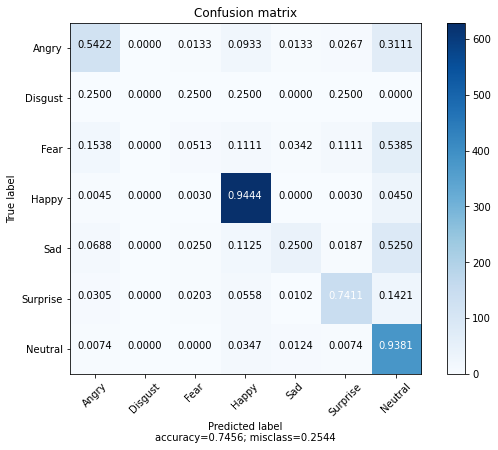

In [ ]:
clf = SVC()
clf.set_params(kernel='rbf', C=5) #Kernel y Slack
clf.fit(X_train, y_train) #Función de entrenamiento del modelo

y_pred = clf.predict(X_valid) #Clases predichas
print('Accuracy = {:f} for c value of {}'.format(accuracy_score(y_valid, y_pred), 1))
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=True)

## Bayes ingenuo

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
def accuracy_score(label, prediction): 
    comp = [1.0 if l==p else 0.0 for (l,p) in zip(label, prediction)]
    return sum(comp)/len(comp)

Accuracy = 0.434856 


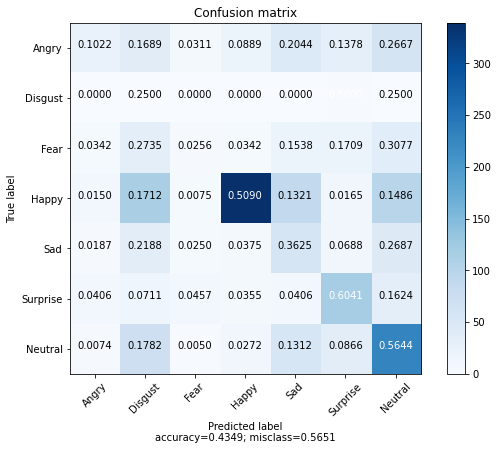

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train) #Función de entrenamiento del modelo

y_pred = gnb.predict(X_valid) #Clases predichas
print('Accuracy = {:f} '.format(accuracy_score(y_valid, y_pred)))
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=True)

## Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
def accuracy_score(label, prediction): 
    comp = [1.0 if l==p else 0.0 for (l,p) in zip(label, prediction)]
    return sum(comp)/len(comp)

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [3, 5, 7, 9, 11, 13, 15]
labels = ['criterion/max_depth']
for depth in max_depth:
    labels.append(str(depth))
table = PrettyTable()
table.field_names = labels
for (i, crit) in enumerate(criterion):
    table_row = [crit]
    for (j, depth) in enumerate(max_depth):
        dtc = DecisionTreeClassifier()
        dtc.set_params(criterion=crit, max_depth=depth) #Criterion y Max_depth
        dtc.fit(X_train, y_train) #Función de entrenamiento del modelo
        y_pred = dtc.predict(X_valid)
        acc = '{:.4f}'.format(accuracy_score(y_valid, y_pred))
        table_row.append(acc)
    table.add_row(table_row)


print(table)

+---------------------+--------+--------+--------+--------+--------+--------+--------+
| criterion/max_depth |   3    |   5    |   7    |   9    |   11   |   13   |   15   |
+---------------------+--------+--------+--------+--------+--------+--------+--------+
|         gini        | 0.5764 | 0.5911 | 0.6261 | 0.6193 | 0.6227 | 0.5984 | 0.5849 |
|       entropy       | 0.5736 | 0.5900 | 0.6283 | 0.6046 | 0.6131 | 0.5900 | 0.5832 |
+---------------------+--------+--------+--------+--------+--------+--------+--------+


Mejor modelo evaluado con criterio 'gini' y max_depth de 7

Accuracy = 0.622673 


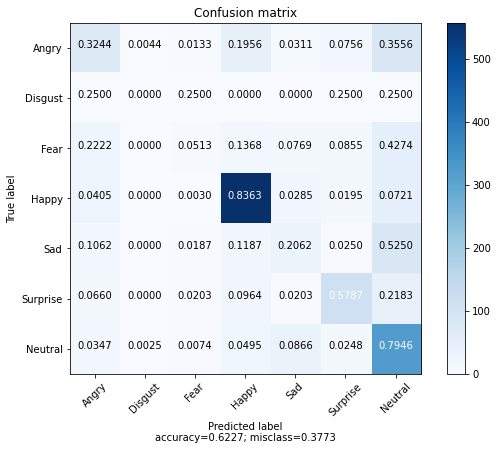

In [ ]:
dtc = DecisionTreeClassifier()
dtc.set_params(criterion='entropy', max_depth=7)
dtc.fit(X_train, y_train) #Función de entrenamiento del modelo

y_pred = dtc.predict(X_valid) #Clases predichas
print('Accuracy = {:f} '.format(accuracy_score(y_valid, y_pred), 1))
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=True)

## preguntas

Las siguientes preguntas son válidas dentro del contexto de los resultados aquí obtenido. Es posible que los alumnos hayan obtenido mejores o peores resultados, y otros simplemente diferentes (como un mejor modelo de otro clasificador). No estamos pidiendo un mínimo de precisión, sino que queremos ver qué tanto han aprendido. Por lo que queremos centrarnos en su metodología y análisis.

Dicho esto, aquellos alumnos con resultados por debajo de 60% en **todos los métodos** pueden tener un error en la extracción de características y elección de los datos. Es importante reevaluar si hay un problema ahí. Otra posible causa es la elección de hiperparámetros. Se debe tener especial cuidado con esto pues son malas decisiones de metodología que hay que saber evaluar.

Finalmente

**Por el entrenamiento de búsqueda de hiperparámetros de los tres métodos: 0.5 pts**

* Se descuenta por no tener todos los métodos trabajados, por no estudiar los hiperparámetros pedidos y en especial por utilizar el set de test en esta parte.
* El uso del set de test aquí puede descontar de 0.2 a 0.3 dependiendo del criterio del ayudante, a menos que el profesor cambie esto. En principio podría descontar todo el puntaje de la pregunta, así que cuidado con este detalle.

¿Qué estrategia tiene mejor resultado con este problema?

Para este problema los vectores de soporte presentan la mejor exactitud (74.96%), seguido por los árboles de decisión (62.83%). 

En este punto, una diferencia de 2% puede quedar dentro de un rango estadísticamente indiferente (o no significativo). Eso quiere decir que sucesivas repeticiones pueden hacer caer los hiperparámetros en puntos similares, aunque diferentes. 

Dicho esto, con este set de experimentos, es sólido afirmar que con una diferencia cercana al 12%, SVM ha demostrado el mejor desempeño.


**Puntaje por esta pregunta: 0.2 pts**

Nuevamente, ajustarse a los resultados.

¿Cuál es la posible razón?

En este caso es probable que los datos sean linealmente separables, en un espacio transformado (por el uso de los kernels). Aunque esto por sí solo, únicamente hace al SVM como un buen candidato. Para derrotar al segundo mejor 
debemos rescatar del análisis algunas desventajas de los árboles de decisión que estén retrasando su desempeño. Dentro de tales desventajas el candidato más importante que se puede observar es la "falta de aprendizaje" de algunos conceptos[1]. 

Sin embargo, no hemos hecho cambios especiales, como la determinación de los atributos más discriminativos, razón por la cual esta técnica podría estar corriendo con desventaja. Este paso se debería hacer en la construcción de las matrices de características; la metodología aquí presente permite hacer un "benchmark" de los datos en crudo, diferencia relevante a la hora de valorar las técnicas.

**Puntaje por esta pregunta: 0.2 pts**

Lo más importante, que se ajuste a los datos y a la materia de clases. Los detalles externos como el aquí citado sirven de apoyo, pero no tienen validez si no se cita la fuente.

¿Por qué le podría ir mal al peor de los clasificadores?

El clasificador bayesiano ingenuo es bastante bueno en general. En este caso, está actuando a brazos amarrados. Uno de los hiperparámetros más importantes es el uso de los piors que se obtienen de analizar el set de datos. Por razones pedagógicas y de tiempo el enunciado no permite dicho análisis, por lo que no se cuenta con esta herramienta al 100%. En cuanto a lo que los experimentos han mostrado hasta aquí, los métodos son sensibles a los hiperparámtros bien escogidos, por lo que no es de extrañar que tan pobre resultado sea equivalente a lo que pueda suceder en el caso del SVM trabajando con un kernel sigmoidal en este problema: no parece haber salida ahí. En este caso solo se puede concluir que bayes ingenuo no ha contado con una oportunidad justa para mostrar su capacidad.

**Puntaje por esta pregunta: 0.1 pts**

Fijarse que la respuesta aluda tanto a la materia como a los datos, al igual que antes.

#Pregunta 4

Esta pregunta tiene 0.1 base siempre y cuando el análisis se haga con el modelo con mejor desempeño, y la matriz de características estudiada en validación para ese modelo e hiperparámetros. No cumplir con esto no solo puede arriesgar este base, sino que el máximo por pregunta llega a 0.2.

¿Cuál es el error más común? (escogiendo SVM, kernel rbf, slack 5)

El error más común se identifica como aquel fuera de la diagonal en la matriz de confusión. En este caso se produce al confundir tristeza con error de 0.525 (o miedo con 0.5385, pues está muy cercano) con la expresión neutral. Este clasificador puede verse como poco empático en esta categoría.

**Puntaje por esta pregunta: 0.3 pts**

Nuevamente, ajustarse a los resultados.

¿Qué categoría obtiene el mejor rendimiento?

Para identificar bien a la categoría con mejor rendimiento debemos observar la diagonal de la matriz de confsión. En este caso, la categoría que obtiene el mejor rendimiento es la de alegría, con un reconocimiento muy cercano al ideal (seguido de neutral). 

**Puntaje por esta pregunta: 0.3 pts**

Nuevamente, ajustarse a los resultados.

¿Cuál es el más bajo?

Nuevamente debemos mirar la diagonal. El reconocimiento más bajo se observa en la categoría de asco, con 0 aciertos. Se puede observar que la distribución de la confusión es pareja con respecto a las otras categorías, exceptuando que nunca confunde asco con tristeza o sorpresa.

**Puntaje por esta pregunta: 0.3 pts**

Nuevamente, ajustarse a los resultados.

#Pregunta 5

Accuracy = 0.745629 for c value of 1


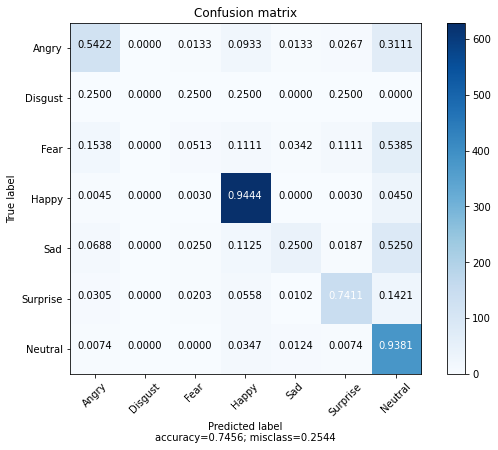

In [ ]:
clf = SVC()
clf.set_params(kernel='rbf', C=5) #Kernel y Slack
clf.fit(X_train, y_train) #Función de entrenamiento del modelo

y_pred = clf.predict(X_valid) #Clases predichas
print('Accuracy = {:f} for c value of {}'.format(accuracy_score(y_valid, y_pred), 1))
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=True)

Accuracy = 0.760588 for c value of 5 and kernel rbf


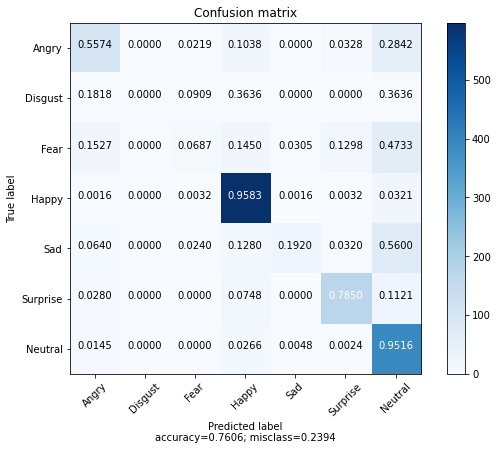

In [ ]:
clf = SVC()
clf.set_params(kernel='rbf', C=5) #Kernel y Slack
clf.fit(X_train, y_train) #Función de entrenamiento del modelo

y_pred = clf.predict(X_test) #Clases predichas
print('Accuracy = {:f} for c value of {} and kernel {}'.format(accuracy_score(y_test, y_pred), 5, 'rbf'))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=True)

**Puntaje por esta matriz: 0.3 pts**

¿Cómo cambian los resultados con respecto a lo obtenido en la parte 4?

Existen cambios mínimos, con tendencias crecientes en algunas clases y decrecientes en otras que en general se compensan para mantener la similitud. Un ejemplo sucede con la tendencia en algunas clases a confundir cualquier categoría con neutral, cuyo número de reconocimiento como clase (en la diagonal) casi no se ve afectado. 

**Puntaje por esta pregunta: 0.3 pts**

Análisis comparativo.

Tanto en test como en validación se puede apreciar que, las tendencias a clasificar bien, como a cometer errores, son muy similares en cada elemento de la matriz. Esto se sostiene con un valor de exactitud (accuracy) estadísticamente similar para la cantidad de datos (inferior al 2%). Se debe considerar que este margen cuantitativo responde, un poco a la experiencia más que nada, pues no se están aplicando tests estadísticos para determinar dicho margen con precisión. 

De aquí se puede concluir que los resultados en validación generalizan bien a test.

**Puntaje por este análisis: 0.4 pts**

#Pregunta 6

<H3>Arquitectura</H3>

Considerando los resultados de los métodos investigados, lo más apropiado en este caso es aplicar una variante de boosting a SVM. Esto sería una estrategia greedy, pues estamos seleccionando el mejor clasificador con un método homogéneo, no obstante parece lo más lógico.

Ciertamente los otros métodos podrían mejorar mucho con un boosting adecuado, pero parten desde una presición menor a SVM (en esta pauta), por lo que se incorpora riesgo. El riesgo es más deseable cuando se está trabajando en una investigación científica, con un objetivo de explorar una mejor forma de hacer las cosas. Aquí el objetivo es directamente hacer una buena clasificación, lo que normalmente implica empezar por lo que se sabe que trabaja mejor.

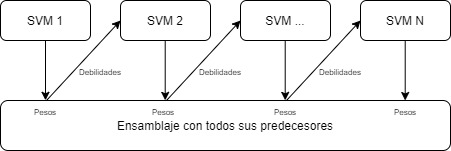

Las características utilizadas en el problema de detección de emociones tienden a ser poco informativas en ciertos grupos. Un adecuado preprocesamiento puede eliminar aquellas que entregan poca información de la clase. Debido a que la metodología utilizada no contempló este punto con profundidad, por ejemplo utilizando análisis de componentes principales, este problema se puede atacar con una etapa de boosting esperando un buen resultado. Por lo tanto, se espera que esta técnica genere un buen ensamblaje al ajustarse a los ejemplos más difíciles creados por las características menos informativas, como se ve que sucede con la clase de emoción Neutral.



Alternativamente se puede presentar un diseño de stack, uso de heterogéneo de métodos, siempre y cuando se piense (a modo de hipótesis únicamente para esta parte) que hay buenas razones para hacer esto. Por ejemplo, una etapa de Bayes Ingenuo, seguida de una etapa de SVM. 

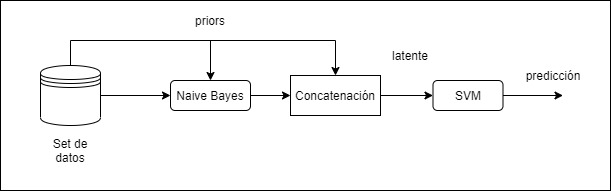

Esta es una arquitectura de Stack. La primera etapa corresponde a una transformación de los datos, a un nuevo espacio. En este caso, un vector de probabilidades que incluye tanto los priors como los posteriors, concatenados. En el caso de reemplazar la concatenación por una suma directa de las probabilidades se pierde interpretabilidad, pero se gana algo que se conoce como residuo. Este espacio se espera que sea más separable, y por lo tanto se le aplica una etapa de SVM. Contaría como un SVM al que se le aplicó un kernel muy específico para dejar las características de una manera más linealmente separable.

**Puntaje de esta parte: 0.4 pts**

* La presentación de una alternativa en esta pauta está para mostrar un ejemplo de respuesta admisible, no la mejor respuesta, que sería el boosting, la primera respuesta.
* Un Stack es una estrategia muy riesgosa. En el ejemplo se presenta una buena hipótesis, y aún así, no se garantiza ningún éxito. Una respuesta como esa tendría 0.2 pts.
* Hacer caso a los resultados de la investigación y proponer algo como lo de arriba podría dar los 0.4 pts si está bien justificado, o 0.3 si no fuese muy robusta la justificación (debe incluir características del problema).


<H3>Bagging y Boosting [2]</H3>

Los métodos de ensamblaje se utilizan para tratar de mejorar las predicciones de los modelos. Se entiende por mejorar, a nivel general, aumentar el accuracy en el caso de un modelo de clasificación o reducir el error absoluto (o cuadrático) medio. Otra forma de entender esta mejora considera que se están reduciendo las deficiencias o debilidades de cada modelo. En cualquier caso, todas las definiciones pasan por un nivel de generalidad muy alto.

Ambos métodos se centrarán en un uso homogéneo de modelos, es decir, utilizarán una única arquitectura en diferentes etapas para generar un modelo más "fuerte". Tal fuerza dependerá de lo que consigue la técnica como mejora para el modelo final.

**Bagging**

Se trata de un método que busca robustecer el modelo reduciendo su varianza. Un set de datos, por bueno que sea, al fin y al cabo es una muestra de la realidad, por lo que un modelo entrenado en diferentes sets puede tener diferentes resultados.

Esta varianza se puede reducir entrenando modelos débiles en subsets de los datos. Si dichos subsets se muestrean adecuadamente mantendrán la distribución del set original. Esto, mientras las muestras sigan siendo representativas, es decir, no muy pequeñas. 

$s_L(.) = \frac{1}{L} \sum_{l=0}^{L}w_l(.)$, promedio simple para un problema de regresión

$s_L(.) = \underset{k}{\mathrm{argmax}}(card(l|w_{l}(.) = k))$, votación democrática para un problema de clasificación (no multiclase)

donde $w_l$ son los modelos débiles o submodelos, y $card$ devuelve la cardinalidad.

**Boosting**

Al igual que con bagging, boosting es una técnica que generará un modelo de predicción más "fuerte" a partir de modelos débiles. En este caso, la definición de "fuerte" será la de un modelo más centrado en reducir sesgos que varianzas, poniendo especial atención a los casos difíciles de predicción para cada modelo débil. También se centra en una colección de modelos homogéneos, es decir, obtenidos de una única arquitectura o técnica en particular.

A diferencia de bagging, boosting trabaja en una secuencia, pipeline, o incrementos del modelos a partir de ciertas suposiciones. Esto lo convierte en una técnica iterativa, que si bien pierde la ventaja de boosting del paralelismo (y con ello de la computación paralela), tiene la ventaja de ser adaptativa según el método de actualización de parámetros.

De manera genérica, los pesos del modelo final se actualizan en cada etapa del boosting, según un conjunto de coeficientes. Esto se puede representar como un promedio ponderado:

$s_L(.) = \frac{1}{L} \sum_{l=0}^{L}c_l\times w_l(.)$

Dos variantes típicamente encontradas en la literatuta son el AdaBoosting y el gradient Boosting.
Con adaptative boosting la actualización de parámetros ocurre en cada paso de iteración con la siguiente secuencia:

$s_L(.) = s_{l-1}(.) + c_l\times w_l(.)$ de donde se escogen $(c_l, w_l)$ en un proceso de optimización.

 $(c_l, w_l) = \underset{c_l, w_l(.)}{\mathrm{argmax}}\sum_{n=1}^{N}e(y_n, s_{l-1}(.) + c_l\times w_l(.))$

Con $e()$ alguna función de pérdida adecuada para el problema.

Mientras que con gradient boosting la optimización imita un descenso de gradiente con paso de actualización:

$s_L(.) = s_{l-1}(.) + c_l\times {\bigtriangledown}_{s_{t-1}}  E(s_{t-1})(.)$



La matemática no es necesaria para lo que se pide en el enunciado, sin embargo es deseable, así como también el pseudocódigo o los diagramas. Estos elementos demuestran una investigación más profunda, ayudan a fortalecer los argumentos (si se usan bien), y a mejorar la comunicación (expresión del mensaje). 



**Puntaje de esta parte: 0.6 pts**

Se obtiene puntaje completo si la explicación basta para que el alumno pueda llegar a implementar los métodos con un mínimo de investigación de los detalles. 

#Referencias

[1] Artyco, *Qué es un árbol de decisión y su importancia en el Data Driven*, (https://artyco.com/que-es-un-arbol-de-decision-y-su-importancia-en-el-data-driven/).

[2] Joseph Rocca, *Ensemble methods: bagging, boosting and stacking* (22/04/19), (https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)

[3] Robert E. Schapire (2003), *Boosting Approach to Machine Learning
An Overview*, MSRI (Mathematical Sciences Research Institute) Workshop on Nonlinear Estimation and Classification.

[4] Zixuan Zhang, *Boosting Algorithms Explained* (26/06/2019), (https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30)